In [57]:
import pandas
import numpy as np

from pyhdf.HDF import HDF, HC
from pyhdf.VS  import VS

filename = 'magswe_data_64sec_2289.hdf'
file_ms = HDF(filename, HC.READ)
vs = file_ms.vstart()

# data_info_list = vs.vdatainfo()
vdata_magswe = vs.attach('MAGSWE_data_64sec')
nrecs, intmode, fields, size, name = vdata_magswe.inquire()

magswe = pandas.DataFrame(data=vdata_magswe[:], columns=fields)

vs.end()
file_ms.close()

In [58]:
import datetime

def parse_year_doy(year, doy, hour, minute, second):
    dt = datetime.datetime(int(year), 1, 1)
    td = datetime.timedelta(days=int(doy) - 1, hours=int(hour), minutes=int(minute), seconds=int(second))
    return dt + td

datetime_data = magswe[['year', 'day', 'hr', 'min', 'sec']]
magswe.index = [parse_year_doy(y, d, h, m, s) for (y, d, h, m, s) in datetime_data.values]
print(magswe)

                     year  day  hr  min        sec      fp_year      fp_doy  \
2001-03-29 00:00:52  2001   88   0    0  52.012798  2001.238358   88.000602   
2001-03-29 00:01:56  2001   88   0    1  56.035198  2001.238360   88.001343   
2001-03-29 00:03:00  2001   88   0    3   0.057600  2001.238362   88.002084   
2001-03-29 00:04:03  2001   88   0    4   3.993600  2001.238364   88.002824   
2001-03-29 00:05:08  2001   88   0    5   8.016000  2001.238366   88.003565   
...                   ...  ...  ..  ...        ...          ...         ...   
2001-04-24 23:55:28  2001  114  23   55  28.012800  2001.312320  114.996852   
2001-04-24 23:56:32  2001  114  23   56  32.035198  2001.312322  114.997593   
2001-04-24 23:57:36  2001  114  23   57  36.057598  2001.312324  114.998334   
2001-04-24 23:58:39  2001  114  23   58  39.993599  2001.312326  114.999074   
2001-04-24 23:59:44  2001  114  23   59  44.015999  2001.312328  114.999815   

                         ACEepoch           Np     

In [59]:
final_magswe = magswe[['Np', 'Vp', 'B_gsm_x', 'B_gsm_y', 'B_gsm_z', 'Bmag']]
print(final_magswe.head())
final_magswe.to_csv('magswe.csv')

                        Np           Vp   B_gsm_x   B_gsm_y   B_gsm_z    Bmag
2001-03-29 00:00:52  3.331 -9999.900391 -1.296167  1.820508 -2.194268  3.1367
2001-03-29 00:01:56  3.179   568.599976 -1.120196  1.486046 -2.449913  3.0817
2001-03-29 00:03:00  3.602   564.669983 -1.331259  1.927612 -2.175092  3.2015
2001-03-29 00:04:03  4.065   566.570007 -1.417159  1.980535 -2.007022  3.1581
2001-03-29 00:05:08  3.446   565.030029 -1.458881  1.928969 -1.949578  3.1100


import numpy
selection = final_magswe < -9999
with pandas.option_context('mode.chained_assignment',None):
    final_magswe[selection.copy(deep=True)] = numpy.NaN

from matplotlib import pyplot

fig, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=[12, 7], sharex='all')

ax1.plot(final_magswe['Np'], 'k-', linewidth=1)
ax2.plot(final_magswe['Vp'], 'k-', linewidth=1)
ax3.plot(final_magswe['B_gsm_z'], 'k-', linewidth=1)

ax1.set_ylabel('$n_p$ [cm$^{-3}$]')
ax2.set_ylabel('$v_p$ [km$\\cdot$s$^{-1}$]')
ax3.set_ylabel('$B_z$ [nT]')

ax1.set_xlim(final_magswe.index[0], final_magswe.index[-1])

pyplot.show()

fig, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=[12, 7], sharex='all')

event_data = final_magswe['2001-04-02':'2001-04-05']

for ax in (ax1, ax2, ax3):
    ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)

ax1.plot(event_data['Np'], 'k-', linewidth=1)
ax2.plot(event_data['Vp'], 'k-', linewidth=1)
ax3.plot(event_data['B_gsm_z'], 'k-', linewidth=1)

ax.set_xlabel('Date and UTC')
ax1.set_ylabel('$n_p$ [cm$^{-3}$]')
ax2.set_ylabel('$v_p$ [km$\\cdot$s$^{-1}$]')
ax3.set_ylabel('$B_z$ [nT]')

ax1.set_xlim(event_data.index[0], event_data.index[-1])
ax1.set_ylim([0, 100])
ax2.set_ylim([350, 1000])
ax3.set_ylim([-50, 50])

pyplot.show()

def parse_year_doy(year, doy, hour):
    #return datetime.datetime(int(year), 1, 1) + datetime.timedelta(days=int(doy) - 1, hours=int(hour))



omni_data = pandas.read_csv ('/Users/rugi/Documents/Earth Observation and Space Weather/Space Weather Events/X20/omni2_Lp0k0iRWBK.lst', sep='\s+', names=['year', 'doy', 'hour', 'Kp*10', 'R', 'F10.7'])

print(omni_data)




def parse_year_doy(year, doy, hour):
    return datetime.datetime(int(year), 1, 1) + datetime.timedelta(days=int(doy) - 1, hours=int(hour))

filename = '/Users/rugi/Documents/Earth Observation and Space Weather/Space Weather Events/X20/omni2_h24kztyiY4.lst.txt'

omni_data = pandas.read_csv(filename, sep='\s+',
                            names=['year', 'doy', 'hour', 'Kp*10', 'R', 'Dst', 'F10.7'],
                            parse_dates={'date':['year', 'doy', 'hour']},
                            date_parser=parse_year_doy,
                            index_col='date',                           
                            na_values=999.9)

print(omni_data.head())

fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Kp*10']['2001-04-02':'2001-04-05'] *.1

ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 0, 4, color='green', alpha=.3)
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 4, 5, color='yellow', alpha=.3)
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 5, 9, color='red', alpha=.3)

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('Kp')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
ax.set_ylim([0, 9])

pyplot.show()

fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_dst = omni_data['Dst']['2001-04-02':'2001-04-05'] *.1

ax.fill_between(pandas.to_datetime(['2001-04-02','2001-04-06']), 5, -30, color='green', alpha=.3)
#ax.fill_between(pandas.to_datetime(['2001-03-30','2001-04-05']), -30, -100, color='yellow', alpha=.3)
ax.fill_between(pandas.to_datetime(['2001-04-02','2001-04-06']), -30, -40, color='red', alpha=.3)

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)

#ax.plot(event_dst, 'k-', linewidth=1)
ax.plot(event_dst, linewidth=1)

ax.set_ylabel('Dst')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
ax.set_ylim([-40, 5])

pyplot.show()

In [60]:
def parse_year_doy(year, doy, hour):
    return datetime.datetime(int(year), 1, 1) + datetime.timedelta(days=int(doy) - 1, hours=int(hour))

filename = '/Users/rugi/Documents/Earth Observation and Space Weather/Space Weather Events/X20/omni all.lst.txt'

omni_data = pandas.read_csv(filename, sep='\s+',
                            names=['year', 'doy', 'hour', 'Bt','Bz', 'Np', 'Vp', 'Kp*10', 'Dst', 'F10.7', 'AE', '>10MeV', '>30MeV', '>60MeV'],
                            parse_dates={'date':['year', 'doy', 'hour']},
                            date_parser=parse_year_doy,
                            index_col='date',                           
                            na_values=999.9)

print(omni_data.head())
omni_data.to_csv('X20 data.csv')


                       Bt    Bz    Np     Vp  Kp*10  Dst  F10.7   AE  >10MeV  \
date                                                                           
2001-03-31 00:00:00   7.4  -3.2  26.0  424.0     67    0  245.3  405    18.6   
2001-03-31 01:00:00  48.2  26.0  29.6  562.0     67    3  245.3  689    13.5   
2001-03-31 02:00:00  47.1  17.0  11.5  639.0     67    5  245.3  417    13.6   
2001-03-31 03:00:00  45.1  -1.0  22.3  703.0     87   26  245.3  936    14.6   
2001-03-31 04:00:00  37.7 -21.6  37.9  716.0     87   -8  245.3  946    17.5   

                     >30MeV  >60MeV  
date                                 
2001-03-31 00:00:00    1.02    0.47  
2001-03-31 01:00:00    0.79    0.46  
2001-03-31 02:00:00    0.92    0.52  
2001-03-31 03:00:00    0.89    0.51  
2001-03-31 04:00:00    0.95    0.50  


/Users/rugi/opt/anaconda3/envs/hs_nb_env/lib/python3.7/site-packages/pandas/io/parsers/base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

data = pd.read_csv('/Users/rugi/Documents/Earth Observation and Space Weather/Space Weather Events/X20/X20 data.csv')
data

,date,Bt,Bz,Np,Vp,Kp*10,Dst,F10.7,AE,>10MeV,>30MeV,>60MeV
0,2001-03-31 00:00:00,7.4,-3.2,26.0,424.0,67,0,245.3,405,18.6,1.02,0.47
1,2001-03-31 01:00:00,48.2,26.0,29.6,562.0,67,3,245.3,689,13.5,0.79,0.46
2,2001-03-31 02:00:00,47.1,17.0,11.5,639.0,67,5,245.3,417,13.6,0.92,0.52
3,2001-03-31 03:00:00,45.1,-1.0,22.3,703.0,87,26,245.3,936,14.6,0.89,0.51
4,2001-03-31 04:00:00,37.7,-21.6,37.9,716.0,87,-8,245.3,946,17.5,0.95,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2001-04-05 19:00:00,9.0,6.0,2.2,573.0,33,-28,207.8,117,25.3,4.44,2.83
140,2001-04-05 20:00:00,8.4,5.4,3.1,558.0,33,-20,207.8,57,24.5,4.10,2.63
141,2001-04-05 21:00:00,6.5,-0.9,4.8,547.0,33,-13,207.8,164,22.8,3.80,2.40
142,2001-04-05 22:00:00,6.7,0.5,3.8,551.0,33,-25,207.8,425,21.6,3.54,2.18


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   Bt      144 non-null    float64
 2   Bz      144 non-null    float64
 3   Np      144 non-null    float64
 4   Vp      144 non-null    float64
 5   Kp*10   144 non-null    int64  
 6   Dst     144 non-null    int64  
 7   F10.7   144 non-null    float64
 8   AE      144 non-null    int64  
 9   >10MeV  144 non-null    float64
 10  >30MeV  144 non-null    float64
 11  >60MeV  144 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 13.6+ KB


In [63]:
data.describe()

,Bt,Bz,Np,Vp,Kp*10,Dst,F10.7,AE,>10MeV,>30MeV,>60MeV
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,11.077778,-0.280556,5.052778,598.590278,39.312500,-82.298611,227.716667,344.590278,69.803264,13.712292,6.700556
std,10.736276,9.668421,6.386721,104.199675,20.746377,88.560128,18.829415,295.443945,99.011735,20.168821,8.452557
min,3.800000,-44.700000,0.700000,424.000000,10.000000,-387.000000,205.000000,42.000000,0.860000,0.320000,0.230000
25%,4.800000,-2.025000,1.900000,508.500000,23.000000,-102.000000,207.800000,98.750000,1.640000,0.440000,0.337500
50%,6.500000,0.500000,2.750000,589.000000,35.000000,-37.500000,225.500000,242.000000,19.300000,3.355000,1.915000
75%,9.650000,3.300000,4.800000,671.250000,50.000000,-26.000000,245.300000,483.750000,101.000000,19.250000,11.225000
max,48.200000,28.900000,37.900000,822.000000,87.000000,26.000000,257.200000,1524.000000,452.000000,95.300000,34.900000


Text(0.5, 1.0, 'Solar Wind and Geomagnetic Parameters Correlation')

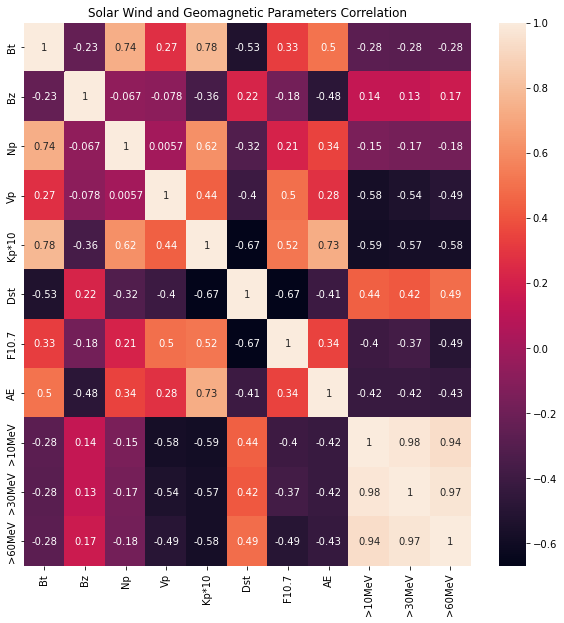

In [120]:
data.corr()

plt.figure(figsize=(10,10))
plot = sns.heatmap(data.corr(), annot = True)
plot.set_title("Solar Wind and Geomagnetic Parameters Correlation")

data.corr()
#round(cormat,2)


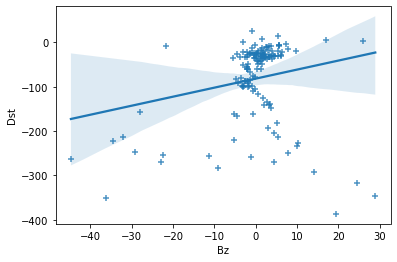

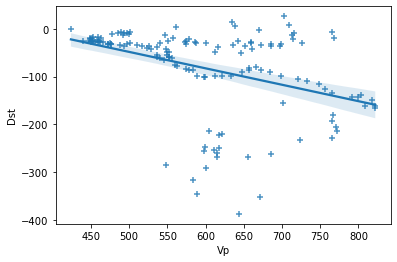

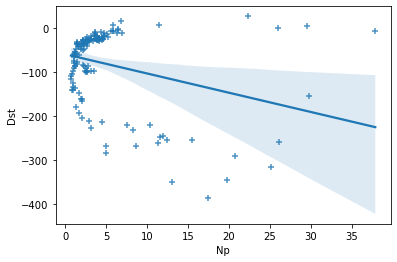

In [122]:
sns.regplot(x= data.Bz,y= data.Dst,marker='+') #Regression plot

plt.show()

sns.regplot(x= data.Vp,y= data.Dst, marker='+')
plt.show()

sns.regplot(x= data.Np,y= data.Dst, marker='+')
plt.show()




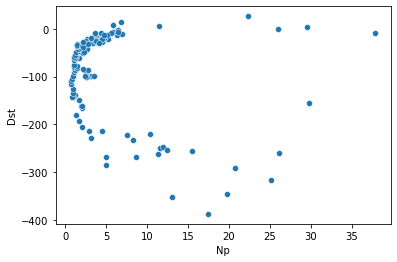

In [115]:
sns.scatterplot(x="Np", y="Dst", data=data)

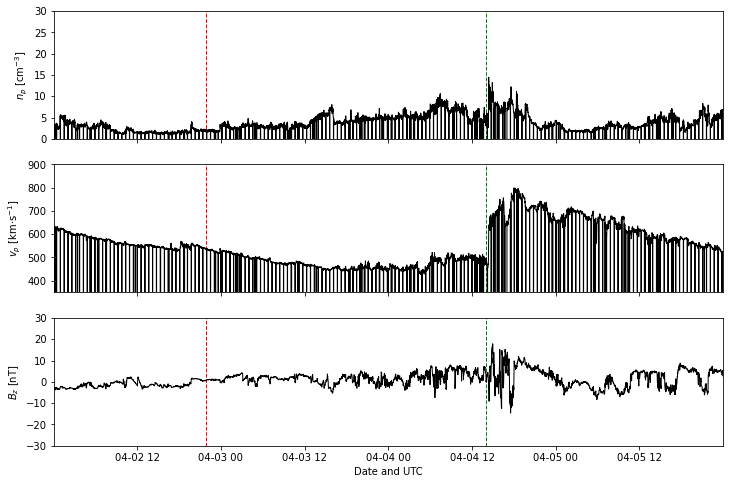

In [65]:
from matplotlib import pyplot

fig, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=[12, 8], sharex='all')

event_data = final_magswe['2001-04-02':'2001-04-05']

for ax in (ax1, ax2, ax3):
    ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)
    ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax1.plot(event_data['Np'], 'k-', linewidth=1)
ax2.plot(event_data['Vp'], 'k-', linewidth=1)
ax3.plot(event_data['B_gsm_z'], 'k-', linewidth=1)

ax.set_xlabel('Date and UTC')
ax1.set_ylabel('$n_p$ [cm$^{-3}$]')
ax2.set_ylabel('$v_p$ [km$\\cdot$s$^{-1}$]')
ax3.set_ylabel('$B_z$ [nT]')

ax1.set_xlim(event_data.index[0], event_data.index[-1])
ax1.set_ylim([0, 30])
ax2.set_ylim([350, 900])
ax3.set_ylim([-30, 30])

pyplot.show()

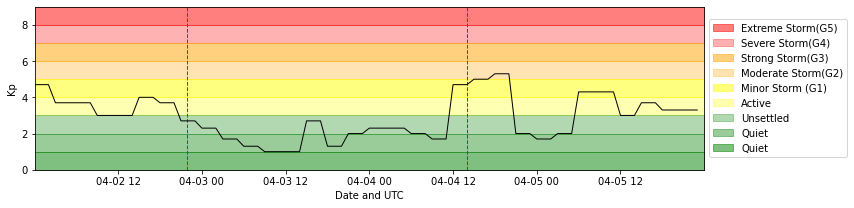

In [66]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Kp*10']['2001-04-02':'2001-04-05'] *.1

ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 8, 9, color='red', alpha=.5, label = 'Extreme Storm(G5)')
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 7, 8, color='red', alpha=.3, label = 'Severe Storm(G4)')
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 6, 7, color='orange', alpha=.5, label = 'Strong Storm(G3)')

ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 5, 6, color='orange', alpha=.3, label = 'Moderate Storm(G2)')
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 4, 5, color='yellow', alpha=.5, label = 'Minor Storm (G1)')
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 3, 4, color='yellow', alpha=.3, label = 'Active')

ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 2, 3, color='green', alpha=.3, label = 'Unsettled')
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 1, 2, color='green', alpha=.4, label = 'Quiet')
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 0, 1, color='green', alpha=.5, label = 'Quiet')

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('Kp')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
ax.set_ylim([0, 9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

pyplot.show()

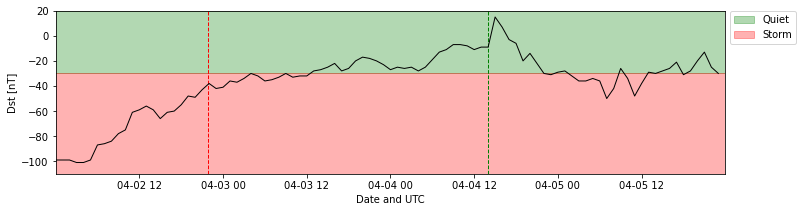

In [67]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Dst']['2001-04-02':'2001-04-05']# *.1

ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 20, -30, color='green', alpha=.3, label = 'Quiet')
#ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), 4, 5, color='yellow', alpha=.3)
ax.fill_between(pandas.to_datetime(['2001-04-01','2001-04-06']), -30, -110, color='red', alpha=.3, label = 'Storm')

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('Dst [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
ax.set_ylim([-110,20])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

pyplot.show()

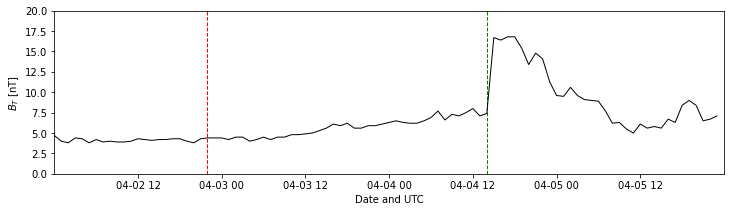

In [68]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Bt']['2001-04-02':'2001-04-05'] 

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$B_T$ [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
ax.set_ylim([0, 20])

pyplot.show()

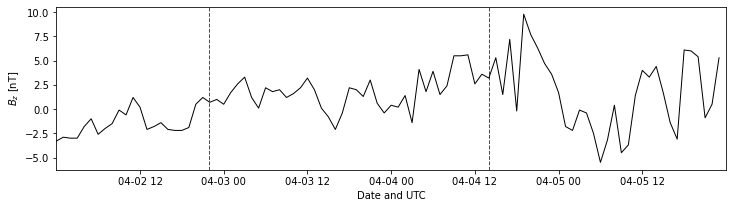

In [69]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Bz']['2001-04-02':'2001-04-05']

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$B_z$ [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])

pyplot.show()

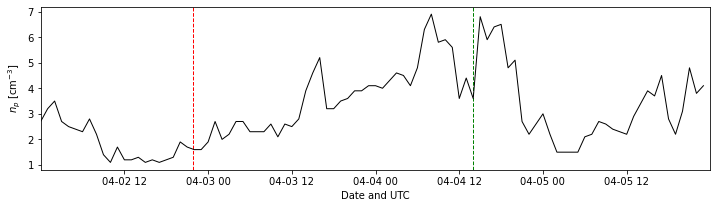

In [70]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Np']['2001-04-02':'2001-04-05']

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$n_p$ [cm$^{-3}$]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])

pyplot.show()

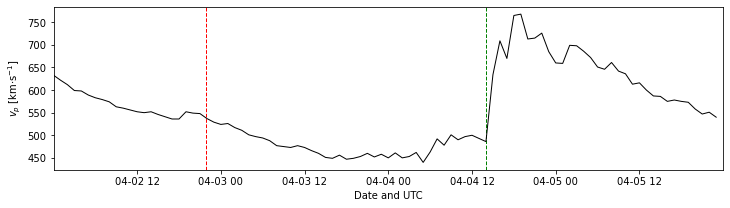

In [71]:


fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['Vp']['2001-04-02':'2001-04-05'] #*.1

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1, label = 'start')
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)
#ax.text(0.4,1.51,'Horizontal Line',rotation=360)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('$v_p$ [km$\\cdot$s$^{-1}$]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([300, 800])
#ax.legend(loc = 'inline')
pyplot.show()

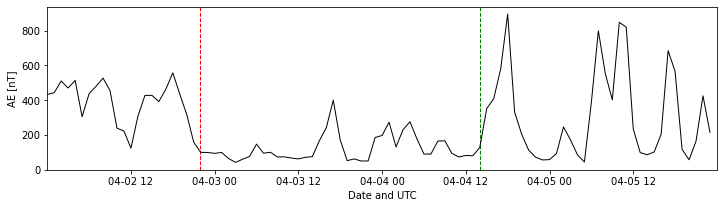

In [72]:

fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_kp = omni_data['AE']['2001-04-02':'2001-04-05']

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1, label = 'start')
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_kp, 'k-', linewidth=1)

ax.set_ylabel('AE [nT]')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])

pyplot.show()

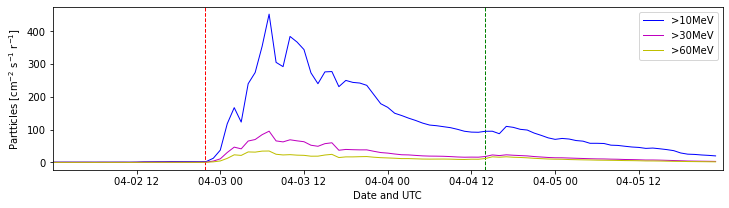

In [73]:
fig, ax = pyplot.subplots(1, 1, figsize=[12, 3], sharex='all')

event_10MeV = omni_data['>10MeV']['2001-04-02':'2001-04-05'] #*.1
event_30MeV = omni_data['>30MeV']['2001-04-02':'2001-04-05'] #*.1
event_60MeV = omni_data['>60MeV']['2001-04-02':'2001-04-05'] #*.1

ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)
ax.axvline(pandas.to_datetime('2001-04-04 14:00'), color='g', linestyle='--', linewidth=1)

ax.plot(event_10MeV, 'k-', linewidth=1, color= 'b', label='>10MeV')
ax.plot(event_30MeV, 'k-', linewidth=1, color= 'm', label='>30MeV')
ax.plot(event_60MeV, 'k-', linewidth=1, color= 'y', label='>60MeV')


ax.set_ylabel('Partticles [cm$^{-2}$ s$^{-1}$ r$^{-1}$] ')
ax.set_xlabel('Date and UTC')
ax.set_xlim(event_data.index[0], event_data.index[-1])
#ax.set_ylim([0, 9])
ax.legend()

pyplot.show()

fig, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=[12, 7], sharex='all')

event_data = final_magswe['2001-04-02':'2001-04-05']

for ax in (ax1, ax2, ax3):
    ax.axvline(pandas.to_datetime('2001-04-02 21:51'), color='r', linestyle='--', linewidth=1)

ax1.plot(event_data['Np'], 'k-', linewidth=1)
ax2.plot(event_data['Vp'], 'k-', linewidth=1)
ax3.plot(event_data['Bt'], 'k-', linewidth=1)

ax.set_xlabel('Date and UTC')
ax1.set_ylabel('$n_p$ [cm$^{-3}$]')
ax2.set_ylabel('$v_p$ [km$\\cdot$s$^{-1}$]')
ax3.set_ylabel('$B_z$ [nT]')

ax1.set_xlim(event_data.index[0], event_data.index[-1])
ax1.set_ylim([0, 100])
ax2.set_ylim([350, 1000])
ax3.set_ylim([-40, 40])

pyplot.show()